<a href="https://colab.research.google.com/github/ishantmr/learning/blob/main/DatasetsAndDataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

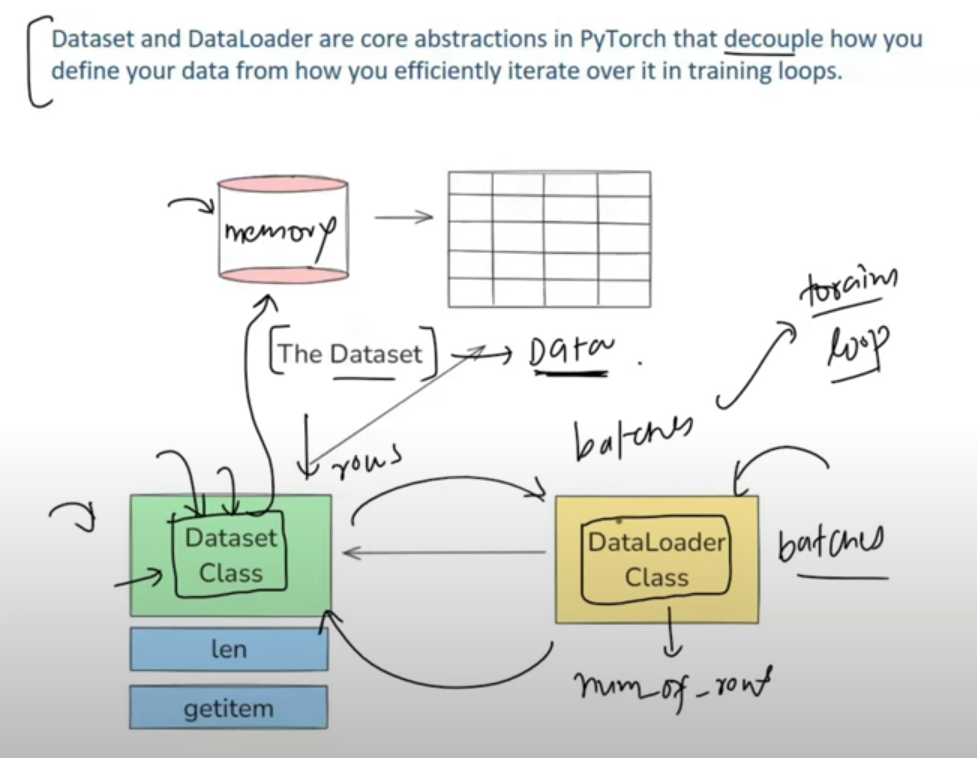

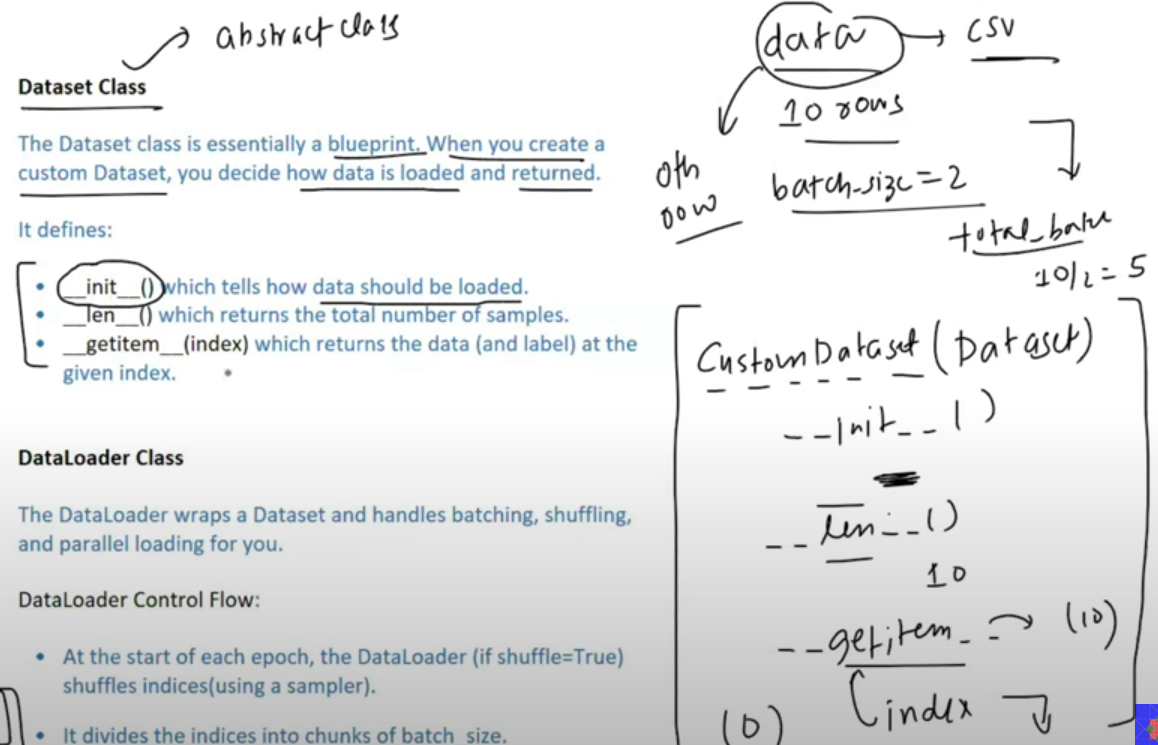

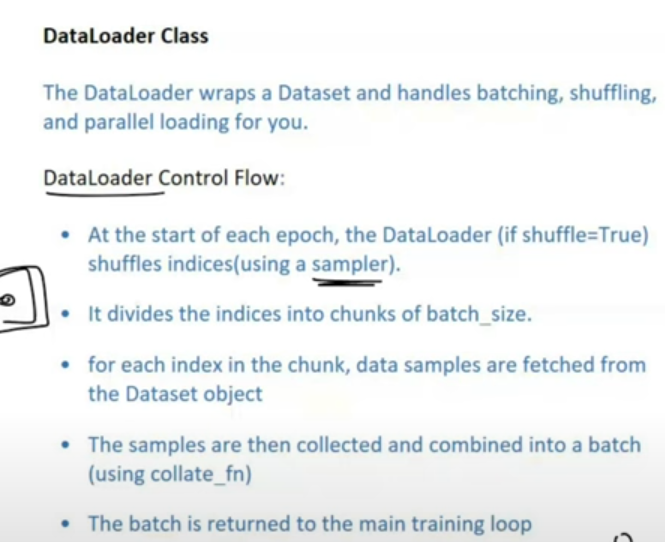

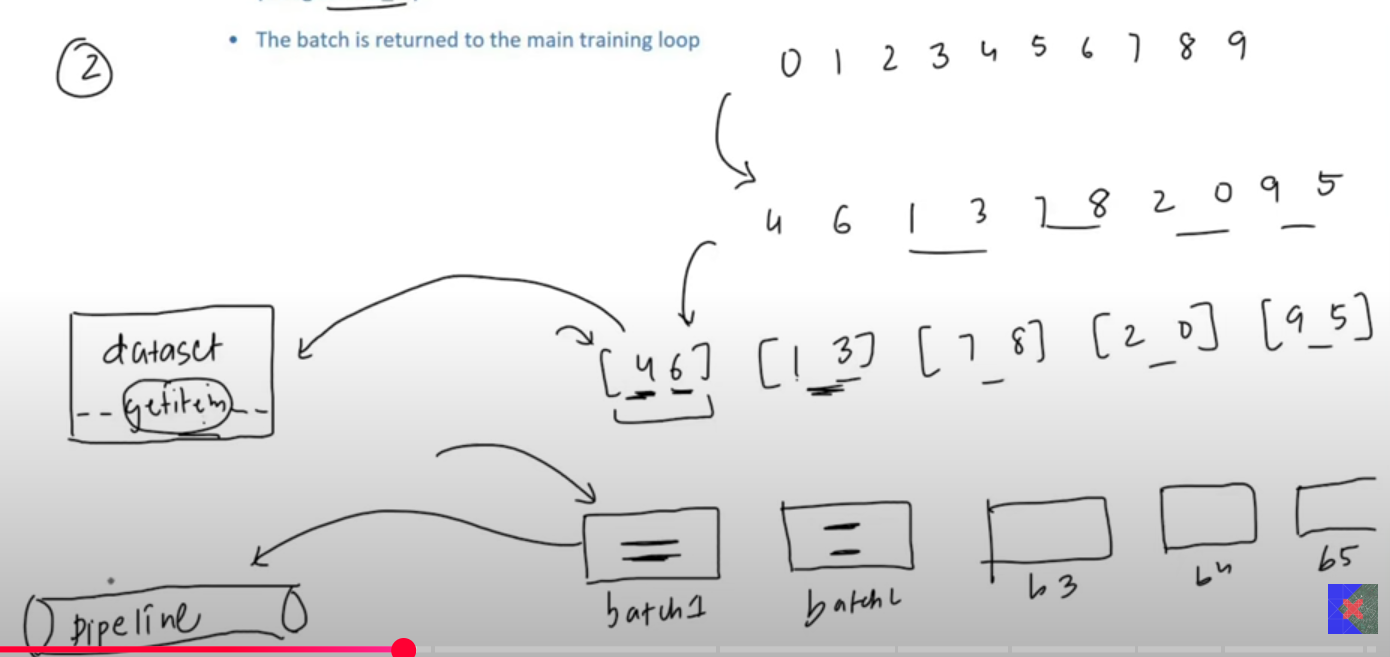

In [ ]:
from sklearn.datasets import make_classification
import torch

In [ ]:
# Setp 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples = 10, # Number of samples
    n_features = 2, # Number of features
    n_informative = 2, # Number of informative features
    n_redundant = 0, # Number of redundant features
    n_classes = 2, # Number of classes
    random_state = 42 # For reporducibility
)

In [ ]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [ ]:
X.shape

(10, 2)

In [ ]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
y.shape

(10,)

In [ ]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

/tmp/ipython-input-11-1211342857.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
/tmp/ipython-input-11-1211342857.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [ ]:
dataset = CustomDataset(X, y)

In [ ]:
len(dataset)

10

In [ ]:
dataset[2]

(tensor([-2.8954,  1.9769]), tensor(0.))

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
for batch_features, batch_labels in dataloader:
  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[-2.8954,  1.9769],
        [ 1.8997,  0.8344]])
tensor([0., 1.])
--------------------------------------------------
tensor([[-0.9382, -0.5430],
        [-0.5872, -1.9717]])
tensor([1., 0.])
--------------------------------------------------
tensor([[ 1.0683, -0.9701],
        [-0.7206, -0.9606]])
tensor([1., 0.])
--------------------------------------------------
tensor([[ 1.7273, -1.1858],
        [-1.9629, -0.9923]])
tensor([1., 0.])
--------------------------------------------------
tensor([[-1.1402, -0.8388],
        [ 1.7774,  1.5116]])
tensor([0., 1.])
--------------------------------------------------


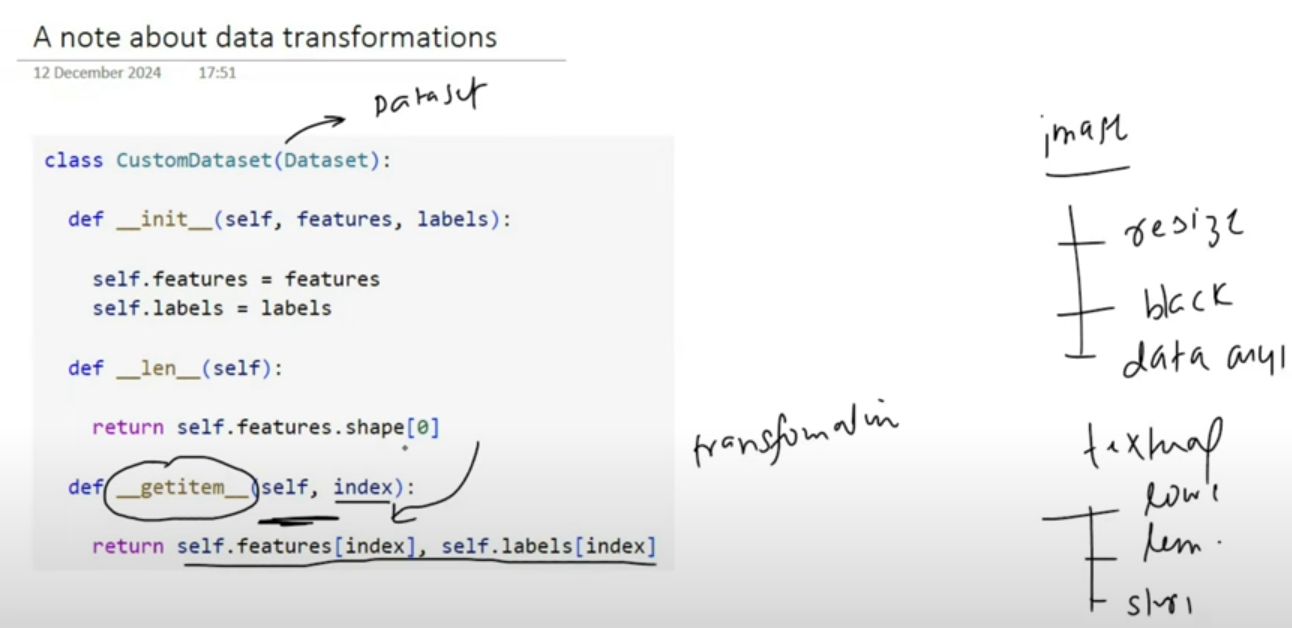

Parrallelization
Number of workers can be increased

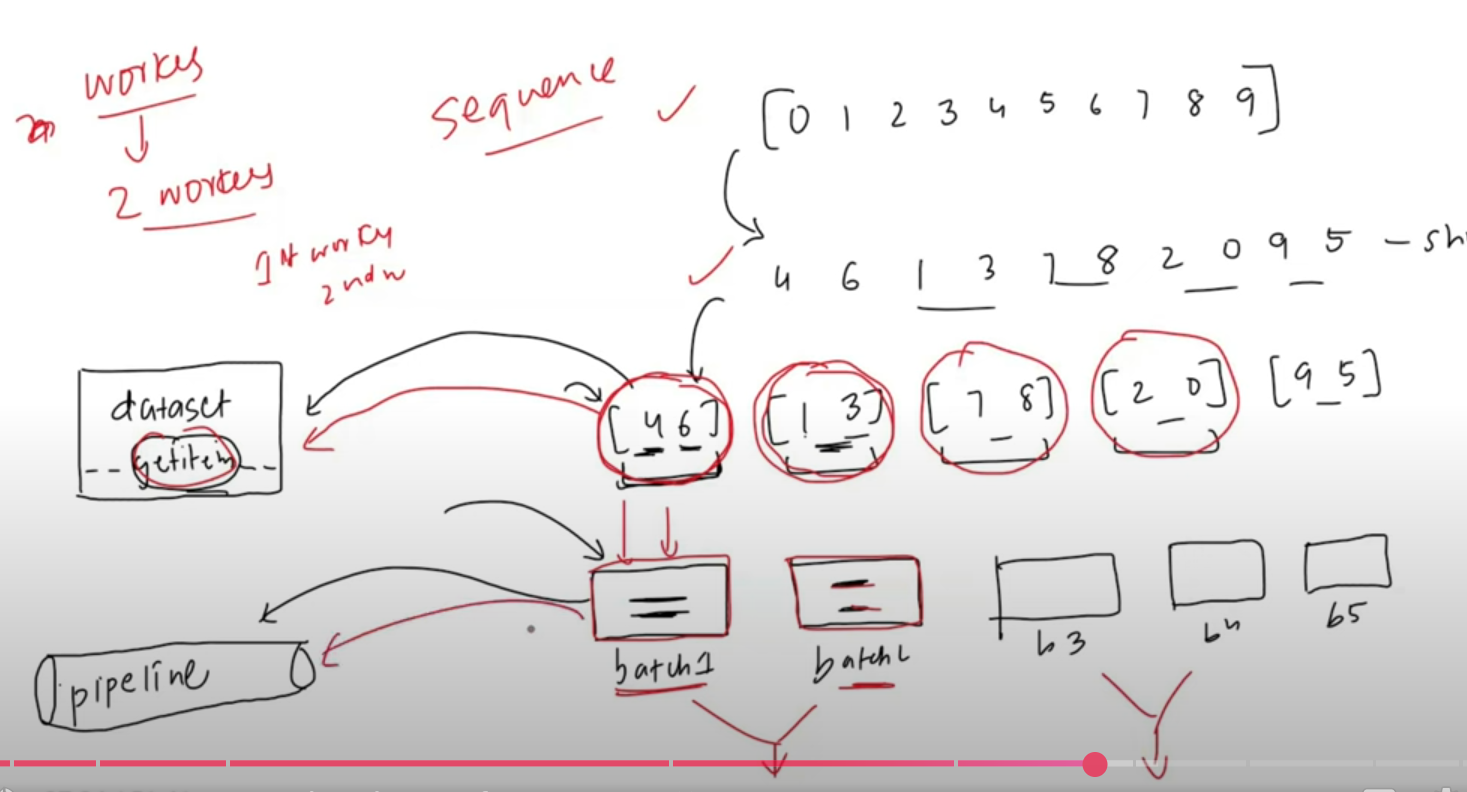


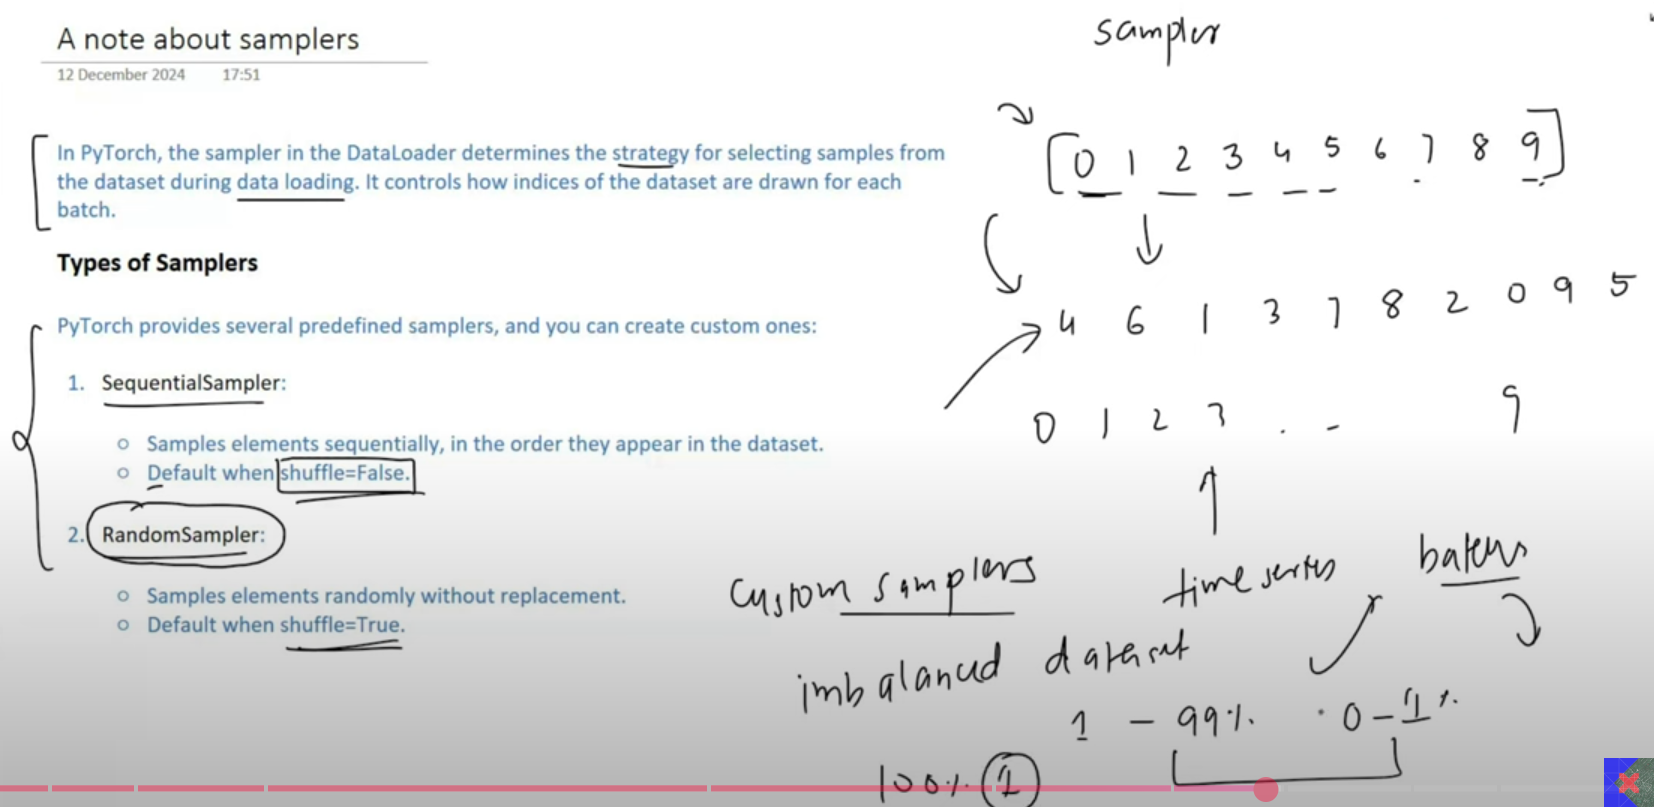

Collate Funcations: Stacking alag alag size ke tensors for batches

We need to perform padding and form batch

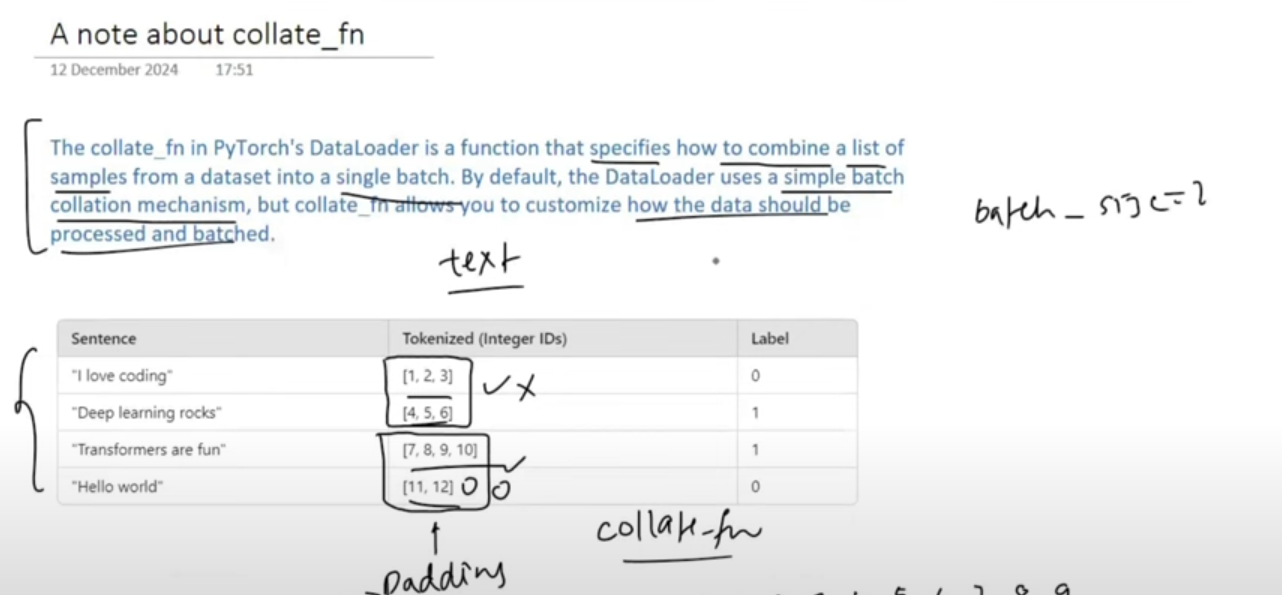
